<a href="https://colab.research.google.com/github/paulalias452/PowerBI-exercises/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recommendation System**

In [ ]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 11.2 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633976 sha256=b7c7b9bfe3eb4f11ec5ab9eaefe9f22b0ce861deda0aea7848bf68968fa8a1ae
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Reader, Dataset, SVD
from surprise.accuracy import rmse,mae
from  surprise.model_selection import cross_validate

In [ ]:
from google.colab import files
uploaded =files.upload()

Saving ratings.csv to ratings.csv


In [ ]:
df=pd.read_csv(r'ratings.csv')
df

,user,movie,rating,timestamp
0,1,1,4.0,9.649827e+08
1,1,3,4.0,9.649812e+08
2,1,6,4.0,9.649822e+08
3,1,47,5.0,9.649838e+08
4,1,50,5.0,9.649829e+08
...,...,...,...,...
19111,122,122882,5.0,1.461561e+09
19112,122,122886,5.0,1.461561e+09
19113,122,122900,4.0,1.461562e+09
19114,122,128360,5.0,1.461561e+09


In [ ]:
df.drop('timestamp',axis=1,inplace=True)

In [ ]:
df.head()

,user,movie,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
movies=df['movie'].nunique()
users=df['user'].nunique()
print('Total number of movies=', movies)
print('Total number of users=', users)

Total number of movies= 4737
Total number of users= 122


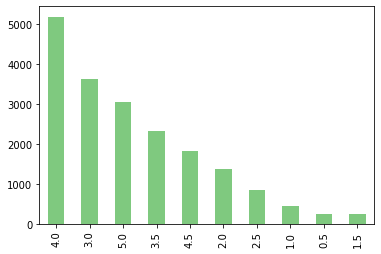

In [ ]:
df['rating'].value_counts().plot(kind='bar',colormap='Accent')

In [ ]:
filter_movies=df['movie'].value_counts()>5

In [ ]:
#filter users who have rated more than 5
filter_movies=filter_movies[filter_movies].index.tolist()
filter_movies

In [ ]:
filter_users=df['user'].value_counts()>5
#filter users who have rated more than 5
filter_users=filter_users[filter_users].index.tolist()
filter_users

In [ ]:
df=df[(df['movie'].isin(filter_movies))&(df['user'].isin(filter_users))]
df.head()

,user,movie,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
columns=['user','movie','rating']

#create reader from surprise
reader=Reader(rating_scale=(0.5,5))

#create dataset from dataframe
data=Dataset.load_from_df(df[columns],reader)

#create trainset
trainset=data.build_full_trainset()

#create testset here the anti_testset is testset
testset=trainset.build_anti_testset()

In [ ]:
model=SVD(n_epochs=25,verbose=True)

In [ ]:
cross_validate(model,data, measures=['RMSE','MAE'], cv=5, verbose=True)
print('Training Done')

In [ ]:
prediction=model.test(testset)
prediction[100]

Prediction(uid=1, iid=3967, r_ui=3.6732949943301474, est=4.615018563298623, details={'was_impossible': False})

In [ ]:
prediction[12]

Prediction(uid=1, iid=91529, r_ui=3.6732949943301474, est=4.533204977402024, details={'was_impossible': False})

In [ ]:
#Now recommendation user top 3 movies based on prediction

from collections import defaultdict
def get_top_n(prediction, n):
  top_n=defaultdict(list)
  for uid, iid, true_r, est, _ in prediction:
    top_n[uid].append((iid, est))

  for uid, user_ratings in top_n.items():
    user_ratings.sort(key=lambda x:x[1], reverse=True)
    top_n[uid]=user_ratings[:n]

  return top_n
top_n=get_top_n(prediction, n=3)
for uid, user_ratings in top_n.items():
  print(uid, [iid for (iid,rating) in user_ratings])

1 [318, 68157, 908]
2 [296, 553, 1196]
3 [1196, 260, 1136]
4 [150, 541, 527]
5 [1197, 1291, 1196]
6 [1196, 57669, 1953]
7 [923, 318, 2997]
8 [1221, 1197, 49272]
9 [318, 1197, 593]
10 [1196, 2160, 1221]
11 [541, 1193, 2300]
12 [1196, 318, 1221]
13 [912, 318, 858]
14 [260, 1197, 541]
15 [6016, 1206, 1250]
16 [1206, 6016, 3147]
17 [908, 1372, 553]
18 [1197, 6016, 55820]
19 [858, 5618, 50]
20 [50, 1197, 1954]
21 [5010, 6016, 32]
22 [1234, 79132, 913]
23 [318, 1196, 68157]
24 [1196, 260, 923]
25 [50, 1089, 1196]
26 [1196, 318, 1197]
27 [3147, 6016, 2571]
28 [1258, 912, 4973]
29 [1197, 541, 1196]
30 [1197, 4011, 541]
31 [260, 318, 1206]
32 [68157, 858, 2959]
33 [1197, 1193, 68157]
34 [296, 527, 55820]
35 [260, 1197, 1196]
36 [68157, 1196, 1197]
37 [50, 1197, 912]
38 [2028, 1197, 541]
39 [2028, 318, 68157]
40 [1197, 4226, 1084]
41 [318, 115617, 47997]
42 [1250, 8636, 541]
43 [50, 260, 527]
44 [1196, 58559, 1197]
45 [750, 2019, 1288]
46 [1197, 1210, 260]
47 [1198, 296, 1197]
48 [318, 5618, 601